## Vaccum Cleaning Agent with locations A and B

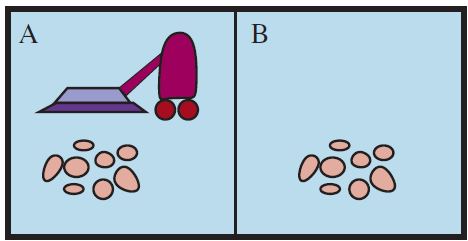

**Figure 2.2** A vacuum-cleaner world with just two locations. Each location can be clean or
dirty, and the agent can move left or right and can clean the square that it occupies. Different
versions of the vacuum world allow for different rules about what the agent can perceive,
whether its actions always succeed, and so on.

# Agent Description:

1. Objective: The aim of the agent .....
2. List the sensors: Location, Status
3. Sensors' values:
>Location -> {A, B}, <br>Status -> {Dirty, Clean}
4. List the actions:
 > Remove Dirt,<br>Go Right, <br>Go Left
5. Agent function: **perception --> action**
> (A, Clean) --> Go Right <br>
> (A, Dirty) --> Remove Dirt<br>
> (B, Clean) --> Go Left<br>
> (B, Dirty) --> Remove Dirt<br>



# Table driven agent

In [ ]:
# Store the agent fucntion as a table
table={('A','Clean'):'Go Right',
       ('A','Dirty'):'Remove Dirt',
       ('B','Clean'):'Go Left',
       ('B','Dirty'):'Remove Dirt'}

In [ ]:
percepts=[]  # to store percept history

def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = table[percept]
    return action

In [ ]:
# lets simulate the agent
import random

# simulating the first perception randomly
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

# to perceieve environment repeatedly
while True:
    # the agent program is being called with current perception
    action = table_driven_agent((Location, Condition))
    print('Action Performed: '+ action)

    # user control to allow next perception
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break

    # simulating the next perception
    # if the previous action was 'Go Right' then in the next perception loc=B is obvious
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    # if the previous action was 'Go Left' then in the next perception loc=A is obvious
    elif action == 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    # if the previous action was 'Remove Dirt' then in the next perception loc remains same and the status=Clean is obvious
    else:
        Condition = 'Clean'

Perception Received: ('B', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.j
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.l
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.p
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.x


# Simple reflex agent

In [ ]:
def simple_reflex_agent(percept):
    print('Perception Received: '+ str(percept))
    location = percept[0]
    status = percept[1]
    if status =='Dirty':
        action = 'Remove Dirt'
    elif location == 'A':
        action = 'Go Right'
    elif location =='B':
        action = 'Go Left'
    return action

In [ ]:
import random
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

while True:
    action= simple_reflex_agent((Location,Condition))
    print('Action Performed: '+ action)
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action== 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    else:
        Condition = 'Clean'

Perception Received: ('A', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.p
Perception Received: ('B', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.x


# Model based agent

In [ ]:
# variables to store available information about the world state
world_state = {'A':'Unknown', 'B':'Unknown'}

def update_state(action, percept, model):
    location = percept[0]
    status = percept[1]

    #update the model based on current perception
    model[location] = status

    #update the model based on action
    if action == 'Remove Dirt':
        model[location]='Clean'
    return model


def model_based_reflex_agent(percept):
    location = percept[0]
    status = percept[1]
    global world_state
    if world_state['A'] == 'Clean' and world_state['B'] == 'Clean':
        action = 'Pause'
        return action
    elif status == 'Dirty':
        action = 'Remove Dirt'
    elif location == 'A':
        action = 'Go Right'
    elif location == 'B':
        action = 'Go Left'

    world_state = update_state(action, percept, world_state)
    print('Perception: '+str(percept))
    print('Action Performed: '+ action)
    print('World State: '+str(world_state))
    return action

In [ ]:
import random
Location = random.choice(['A','B'])
Condition= random.choice(['Clean','Dirty'])

while True:
    print('*****')
    action = model_based_reflex_agent((Location,Condition))
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Remove Dirt':
        Condition = 'Clean'
    elif action == 'Pause':
        cmd = input('Type x to exit! or any key to Restart.')
        if(cmd == 'x'): break
        Location = random.choice(['A','B'])
        Condition = random.choice(['Clean','Dirty'])
        world_state = {'A':'Unknown', 'B':'Unknown'}


*****
Perception: ('B', 'Dirty')
Action Performed: Remove Dirt
World State: {'A': 'Unknown', 'B': 'Clean'}
*****
Perception: ('B', 'Clean')
Action Performed: Go Left
World State: {'A': 'Unknown', 'B': 'Clean'}
*****
Perception: ('A', 'Dirty')
Action Performed: Remove Dirt
World State: {'A': 'Clean', 'B': 'Clean'}
*****
Type x to exit! or any key to Restart.x
